In [64]:
import eredivisie_nlp as enlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [58]:
df = pd.read_pickle(enlp.determine_root() + "/data/grades+twitter.pkl")
# there's a handful of rows where we do not have all the data, let's drop these for now
df = df[df['FM'].notna()]
df = df[df['AD'].notna()]
# normalize the fotmob scores, to have the same average as AD and VI
df.FM = df.FM - 1
df.reset_index(inplace=True)

In [59]:
def make_confusion_matrix(column: str):
    """
    DOCSTRING
    :param column: AD / VI / FOTMOB
    """


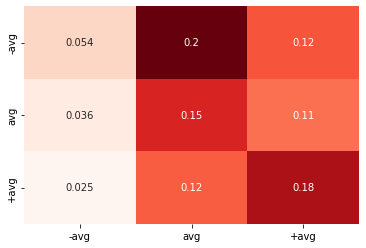

In [76]:
# get necessary data
media = np.zeros(df.shape[0])
column = 'AD'
above = df[column] > 6
below = df[column] < 6
# set media grades
for x in range(len(media)):
    if above[x]:
        media[x] = 1
    elif below[x]:
        media[x] = -1
    else:
        pass  # average score


twitter = np.zeros(df.shape[0])
above = df['score_p_no_s'] > 0
below = df['score_p_no_s'] < 0
# set twitter grades
for x in range(len(twitter)):
    if above[x]:
        twitter[x] = 1
    elif below[x]:
        twitter[x] = -1
    else:
        pass  # average score

cf = confusion_matrix(media, twitter)
sns.heatmap(cf/np.sum(cf), annot=True, cmap='Reds', cbar=False, xticklabels=['-avg', 'avg', '+avg'], yticklabels=['-avg', 'avg', '+avg'])
plt.show()
# x-axis is tweets (little negatives), y-axis is media outlet

In [81]:
sum(df.AD < 6)

1658

In [95]:
print(f"Positive tweets: {len([t for t in twitter if t > 0])}")
print(f"Neutral tweets: {len([t for t in twitter if t == 0])}")
print(f"Negative tweets: {len([t for t in twitter if t < 0])}")

Positive tweets: 1794
Neutral tweets: 2066
Negative tweets: 502


In [93]:
print(f"Positive tweets: {len([t for t in media if t > 0])}")
print(f"Neutral tweets: {len([t for t in media if t == 0])}")
print(f"Negative tweets: {len([t for t in twitter if t < 0])}")

1404

In [87]:
1404/4362

0.3218707015130674

In [86]:
len(media)

4362

In [85]:
len([m for m in media if m > 0])

1404